# LeeQ Example notebook

This notebook provides the examples of basic usage of the LeeQ software

## Load the environment

In [1]:
import leeq
from simulated_setup import * # Change to your customized setup file
import numpy as np
from scipy import optimize as so
from leeq.experiments.builtin import *
import plotly.graph_objects as go
from leeq.chronicle import log_and_record, register_browser_function

from leeq.utils.compatibility import *
from leeq.core.elements.built_in.qudit_transmon import TransmonElement
from leeq.experiments.builtin import *

## Initialize qubits configuration

In [ ]:
simulation_setup()

# Launch Chronicle viewer for monitoring completed experiments
from leeq.chronicle import Chronicle
chronicle = Chronicle()
chronicle.launch_viewer(port=8051)
print("Chronicle viewer launched at http://localhost:8051")
print("You can monitor completed experiments as they finish.")

# setup().start_live_monitor() # When needed you can setup the live monitor.
setup().status().set_param("Shot_Number", 500)
setup().status().set_param("Shot_Period", 500)                              
  
dut_dict = {
    'Q1': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_a},
    'Q2': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_b}
}

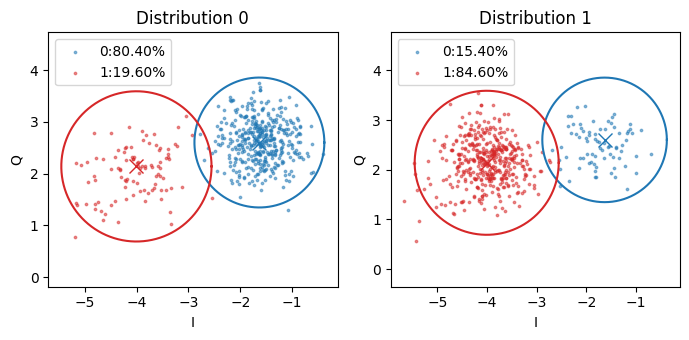

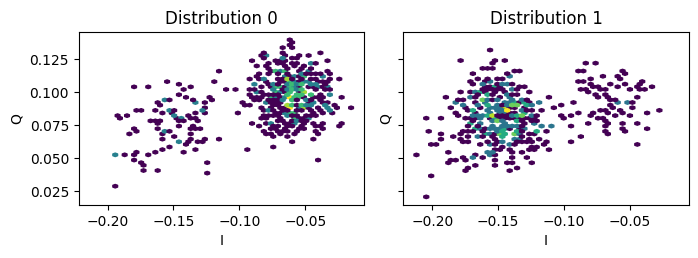

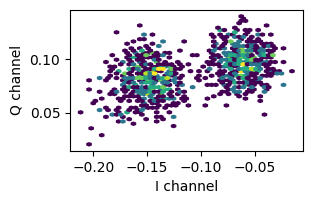

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

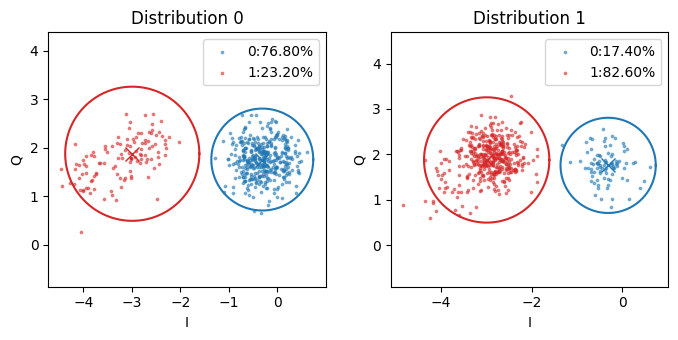

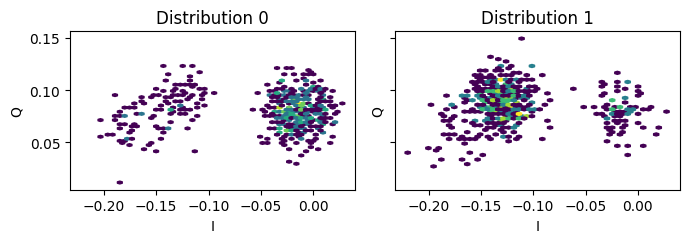

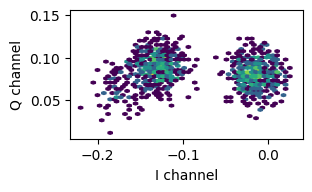

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

In [3]:
duts_dict = {}
for hrid, dd in dut_dict.items():
    if (dd['Active']):
        if (dd['FromLog']):
            dut = TransmonElement.load_from_calibration_log(dd['Params']['hrid'])
        else:
            dut = TransmonElement(name=dd['Params']['hrid'],parameters=dd['Params'])
            
        if (dd['Tuneup']):
            dut.save_calibration_log()
        else:
            lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])
            calib = MeasurementCalibrationMultilevelGMM(dut, mprim_index=0,sweep_lpb_list=lpb_scan)
        dut.print_config_info()
        duts_dict[hrid] = dut

dut = None

# Resonators Spectroscopy

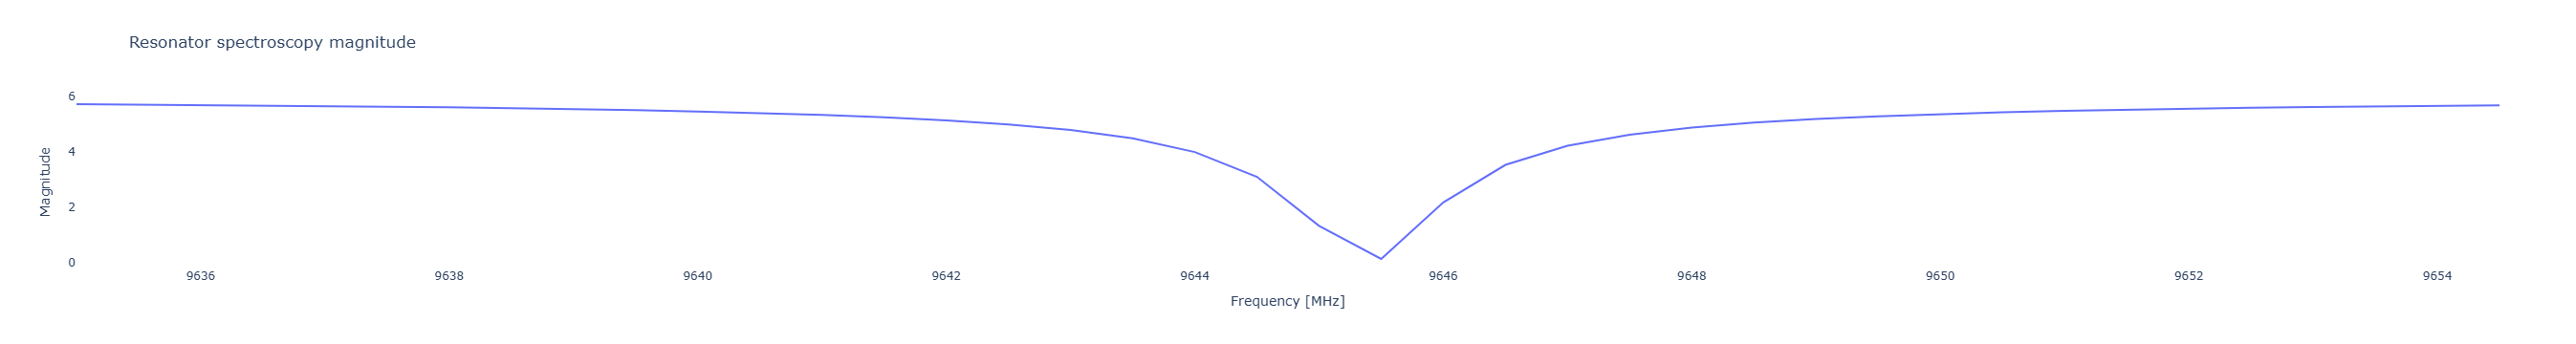

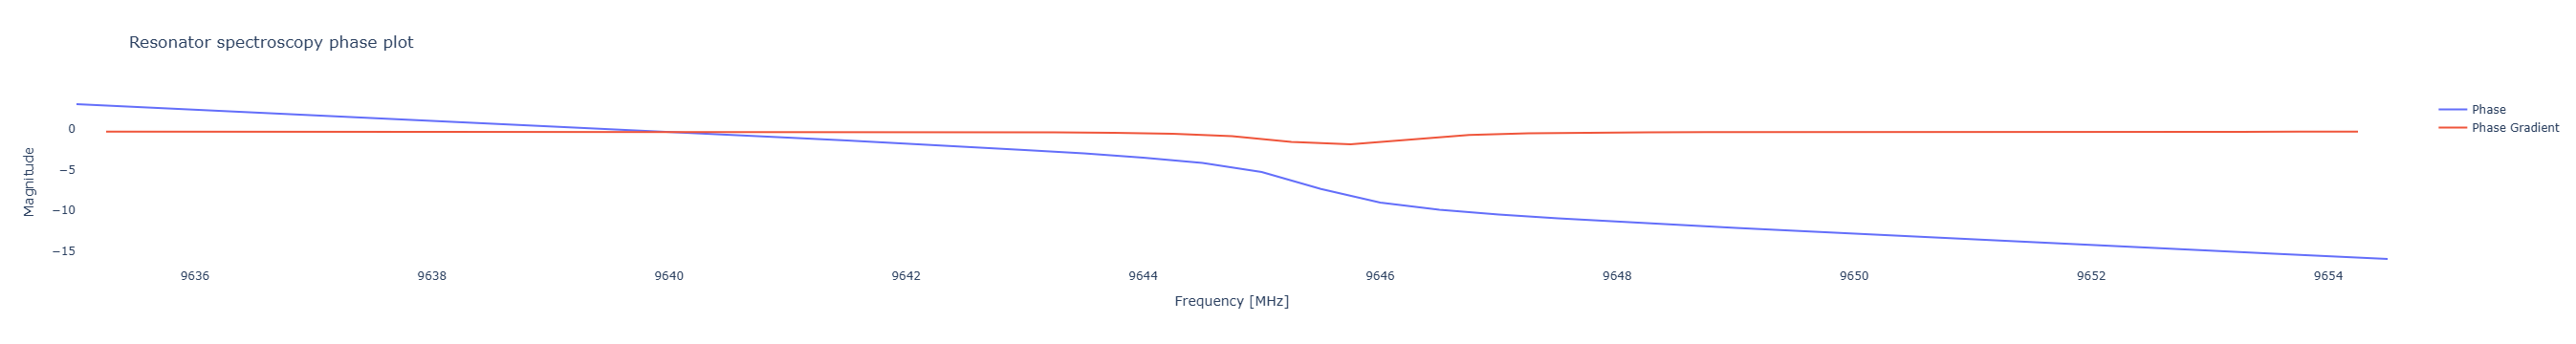

Phase gradient fit f0:9645.444304209255, Q:23743.233277598, amp:5.108659754905697, base:-0.4978302545525812 kappa:0.406240


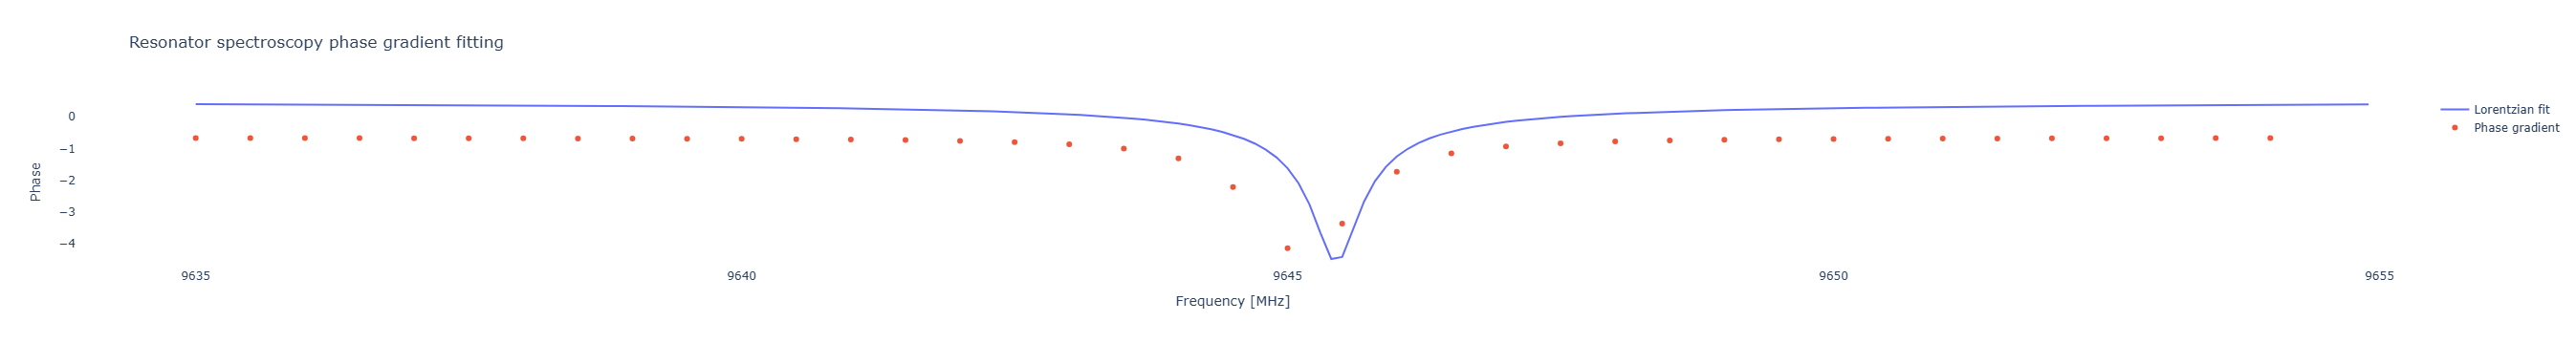

<IPython.core.display.JSON object>

<Experiment: ResonatorSweepTransmissionWithExtraInitialLPB>

In [4]:
dut = duts_dict['Q1']                                # device under test (qubit and resonator pair)
mprim = dut.get_measurement_prim_intlist(0)         # resonator measurement params
c1 = dut.get_c1('f01')                              # qubit pulse collection

ResonatorSweepTransmissionWithExtraInitialLPB(dut,
            start = 9645-10,
            stop  = 9645+10,
            step = 0.5,
            num_avs = 10000,
            rep_rate = 0.0,
            mp_width = 8,
            amp=0.03
)

## Qubits Tuneup

### Calibrate single qubit pulse amplitute

Amplitude updated: 0.5444343733317039


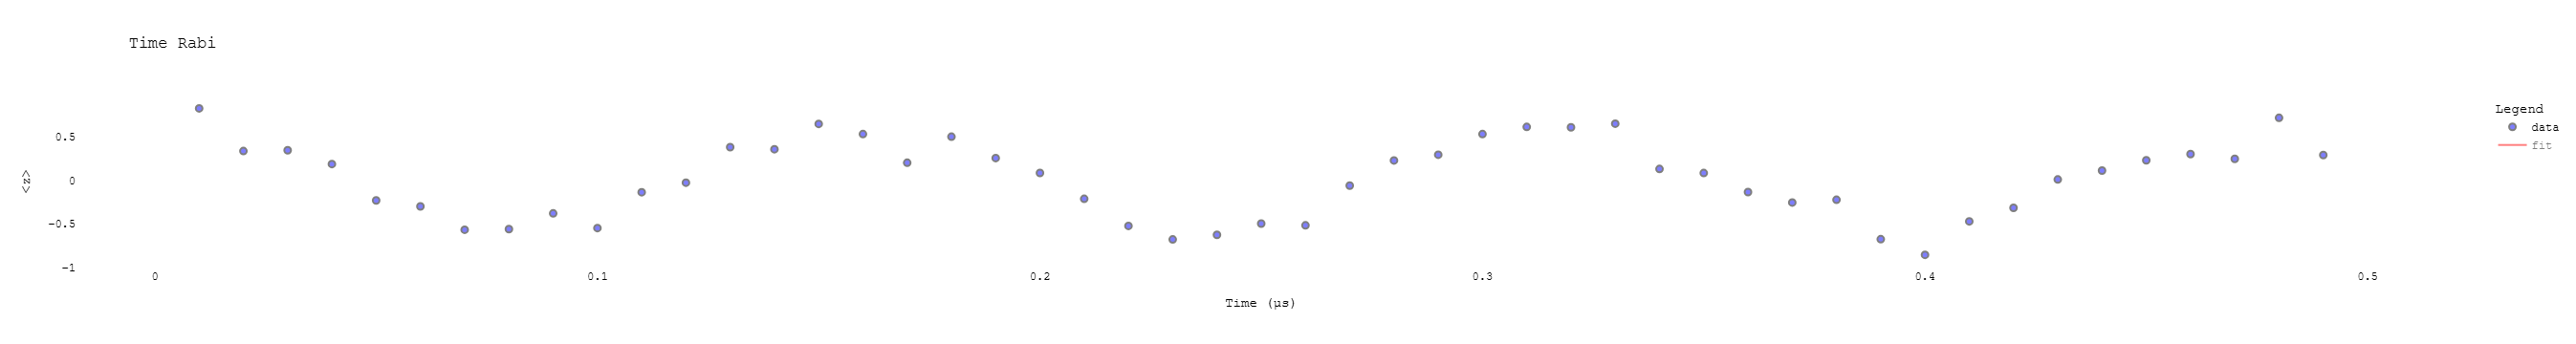

<IPython.core.display.JSON object>

In [5]:
rabi = NormalisedRabi(dut_qubit=dut,step=0.01,stop=0.5, amp=0.19905818643939352,update=True)

### Calibrate single qubit gate frequency then amplitute again

Sampling noise is enabled


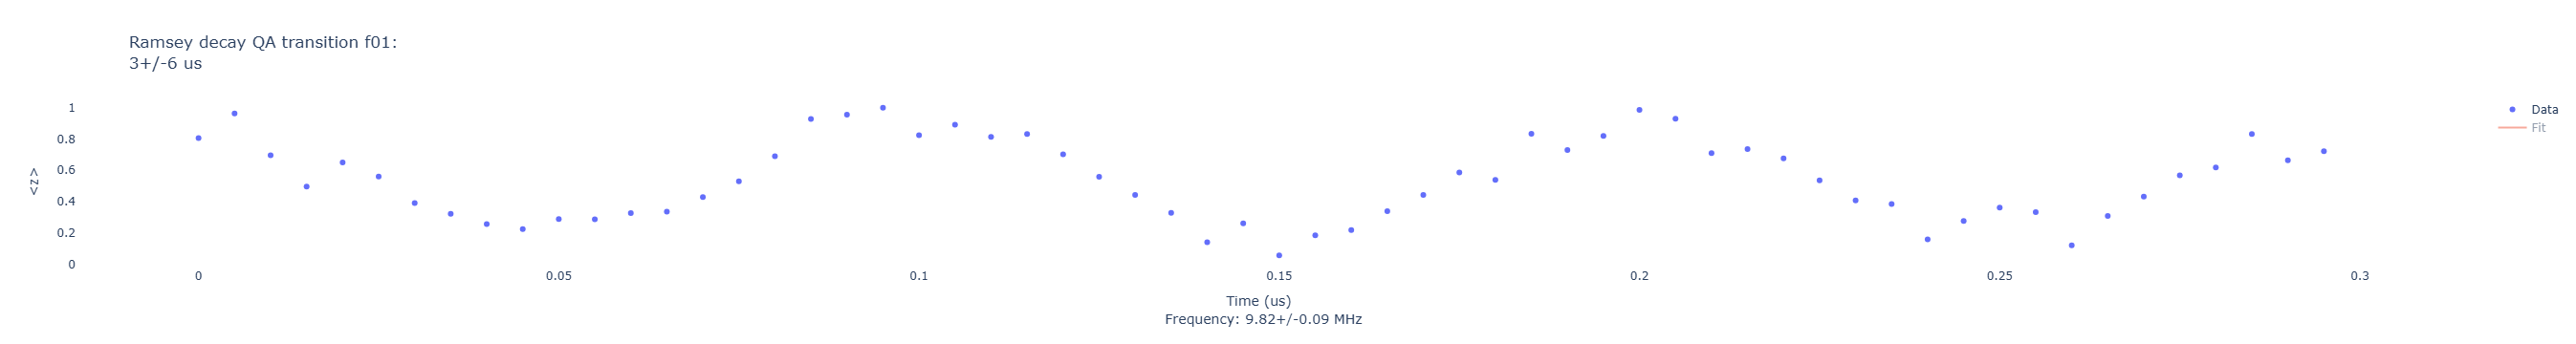

<IPython.core.display.JSON object>

Sampling noise is enabled


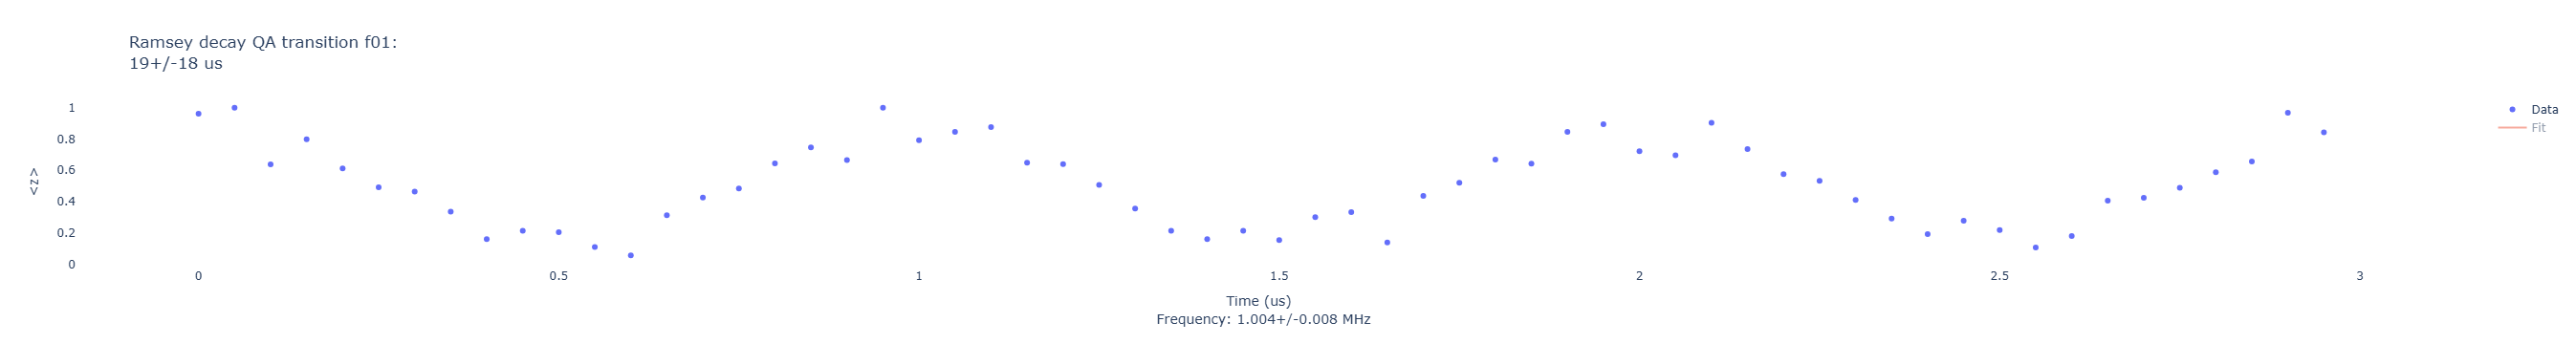

<IPython.core.display.JSON object>

Sampling noise is enabled


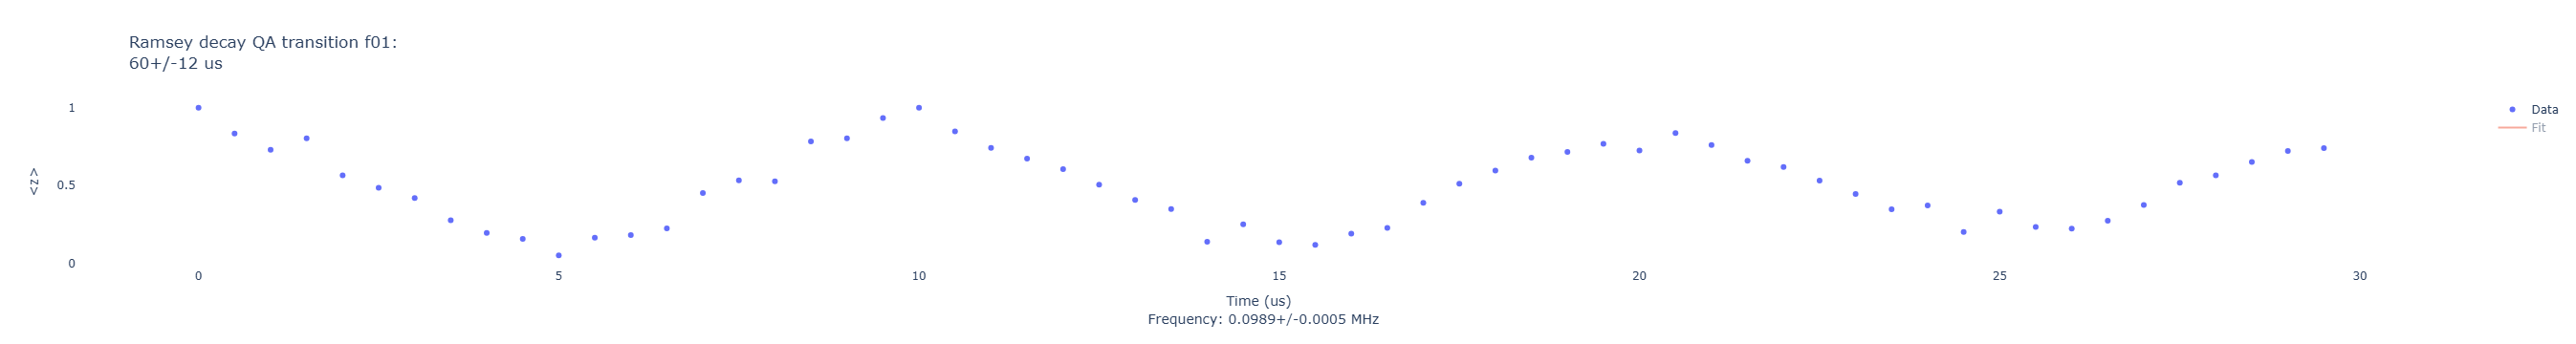

<IPython.core.display.JSON object>

In [6]:
# Ramsey
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=10,stop=0.3,step=0.005)
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=1,stop=3,step=0.05)
ramsey = SimpleRamseyMultilevel(dut=dut,set_offset=0.1,stop=30,step=0.5)
    

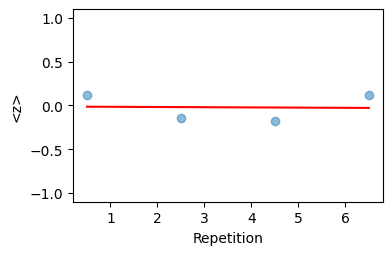

<IPython.core.display.JSON object>

Estimated best amplitude 0.544+/-0.008


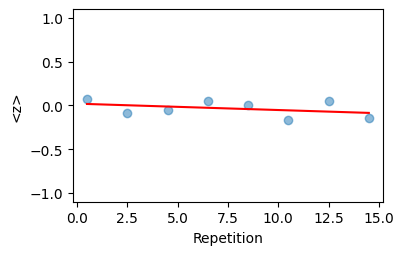

<IPython.core.display.JSON object>

Estimated best amplitude 0.5428+/-0.0012


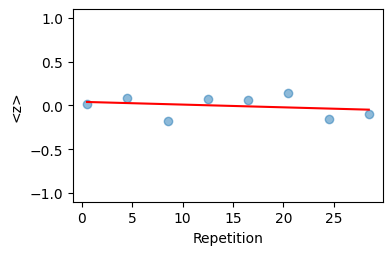

<IPython.core.display.JSON object>

Estimated best amplitude 0.5422+/-0.0008


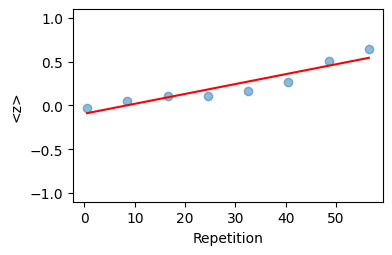

<IPython.core.display.JSON object>

Estimated best amplitude 0.54418+/-0.00029


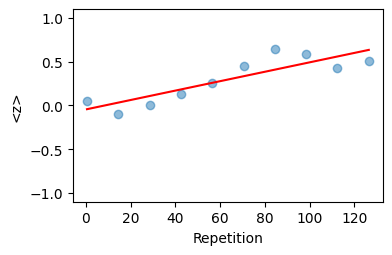

<IPython.core.display.JSON object>

Estimated best amplitude 0.54511+/-0.00019


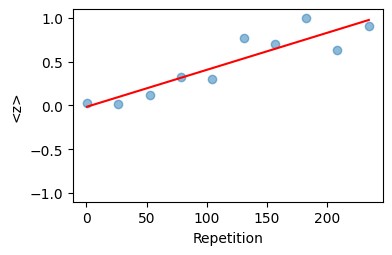

<IPython.core.display.JSON object>

Estimated best amplitude 0.54585+/-0.00012


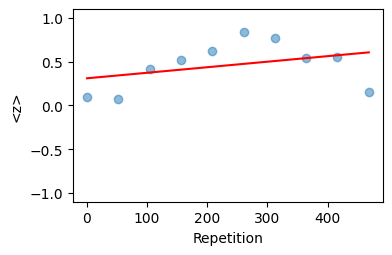

<IPython.core.display.JSON object>

Estimated best amplitude 0.54596+/-0.00010


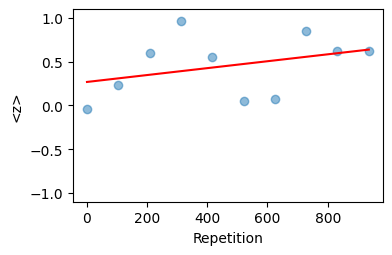

<IPython.core.display.JSON object>

Estimated best amplitude 0.54602+/-0.00006


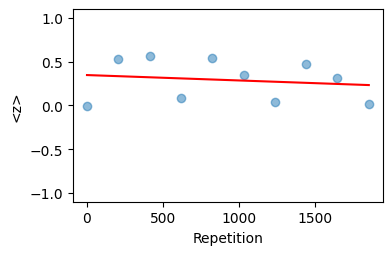

<IPython.core.display.JSON object>

Estimated best amplitude 0.546013+/-0.000023


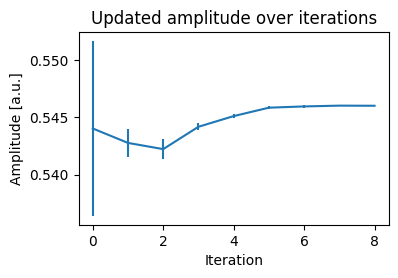

<IPython.core.display.JSON object>

Calibrating alpha by all XY f01


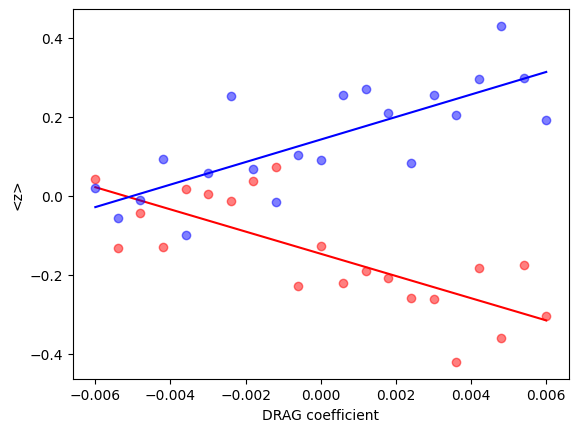

<IPython.core.display.JSON object>

Guessed alpha: -195.72468525908775
alpha_lower: None alpha_higher: 1000000000.0


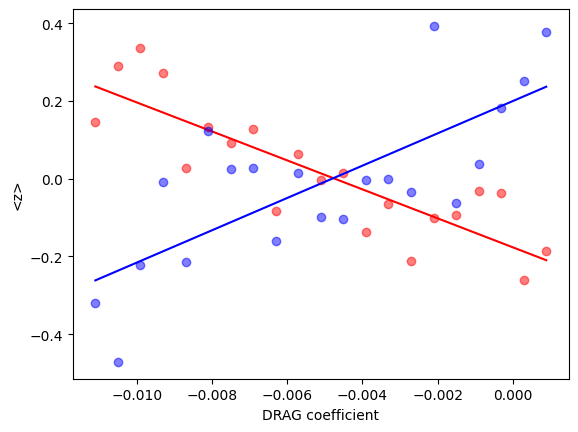

<IPython.core.display.JSON object>

Guessed alpha: -209.4328949967297


<IPython.core.display.JSON object>

In [7]:
# pingpong
pingpong = AmpPingpongCalibrationSingleQubitMultilevel(
        dut = dut
    )
    
# Drag
drag = CrossAllXYDragMultiRunSingleQubitMultilevel(
        dut = dut
    )

### Coherence (T1 T2 echo T2 ramsey)

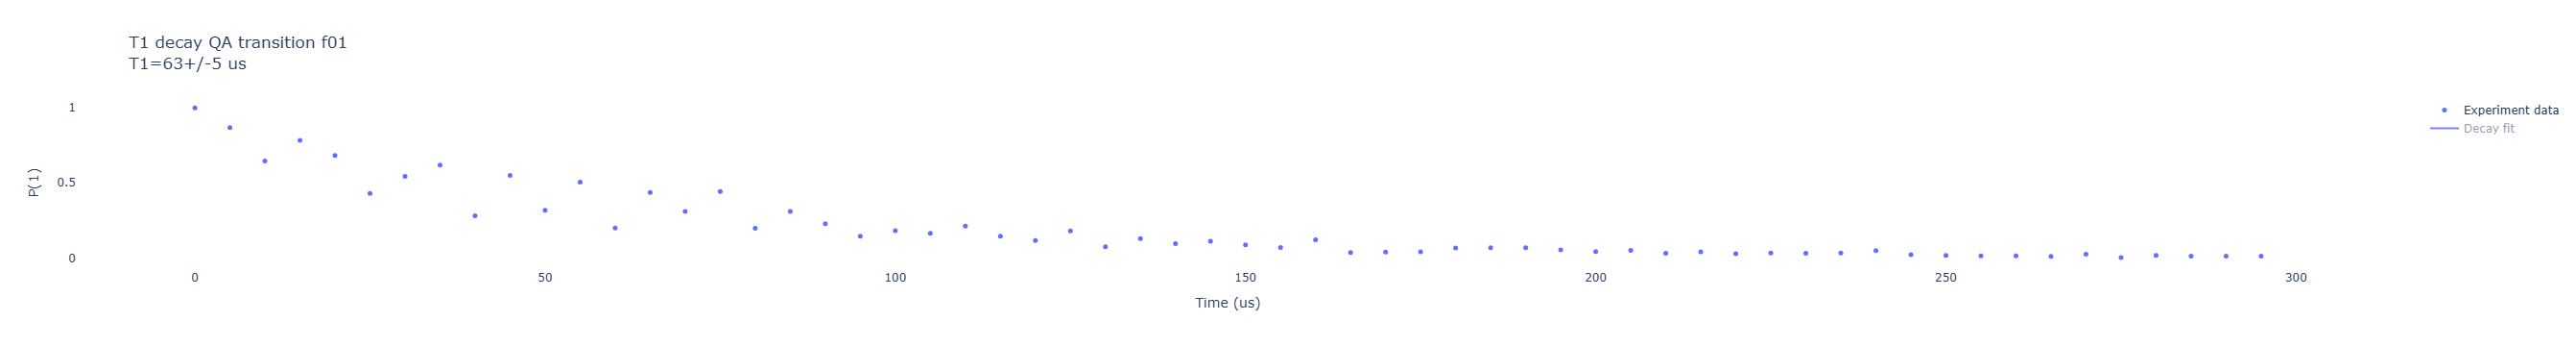

<IPython.core.display.JSON object>

<Experiment: SimpleT1>

In [8]:
SimpleT1(qubit=duts_dict['Q1'],time_length=300,time_resolution=5)


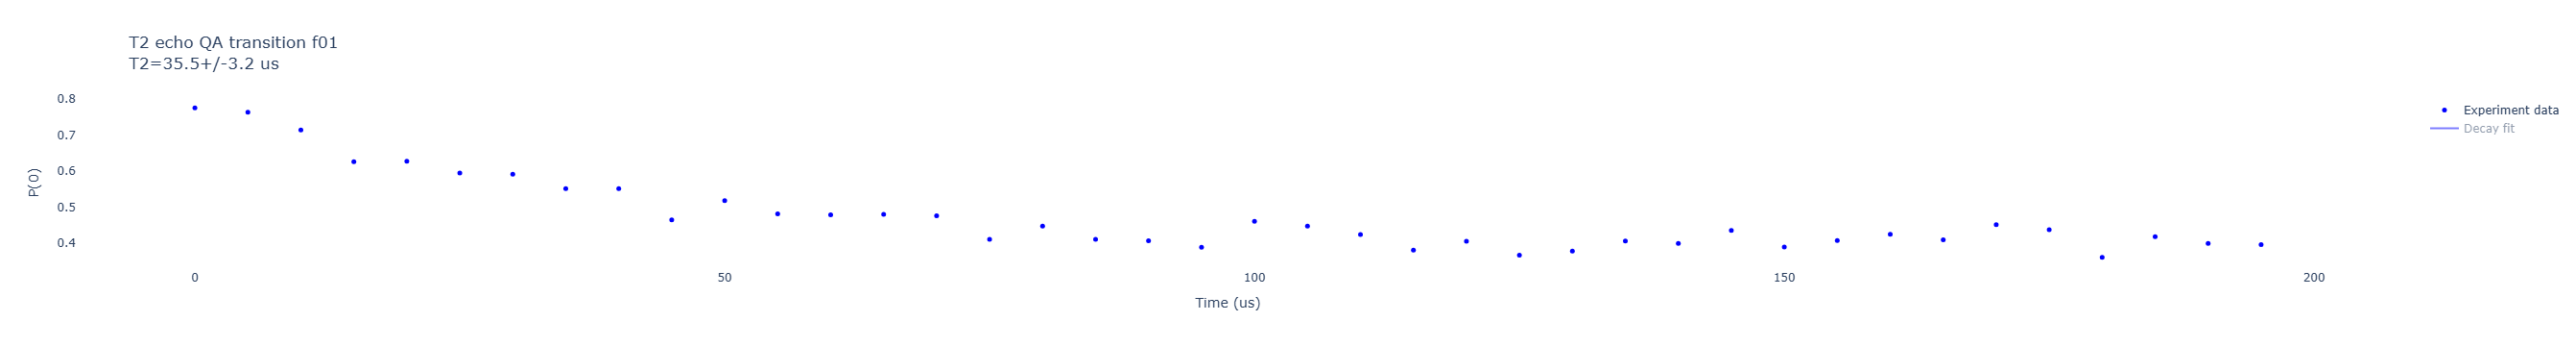

<IPython.core.display.JSON object>

In [9]:
echo = SpinEchoMultiLevel(dut=duts_dict['Q1'],free_evolution_time=200,time_resolution=5)


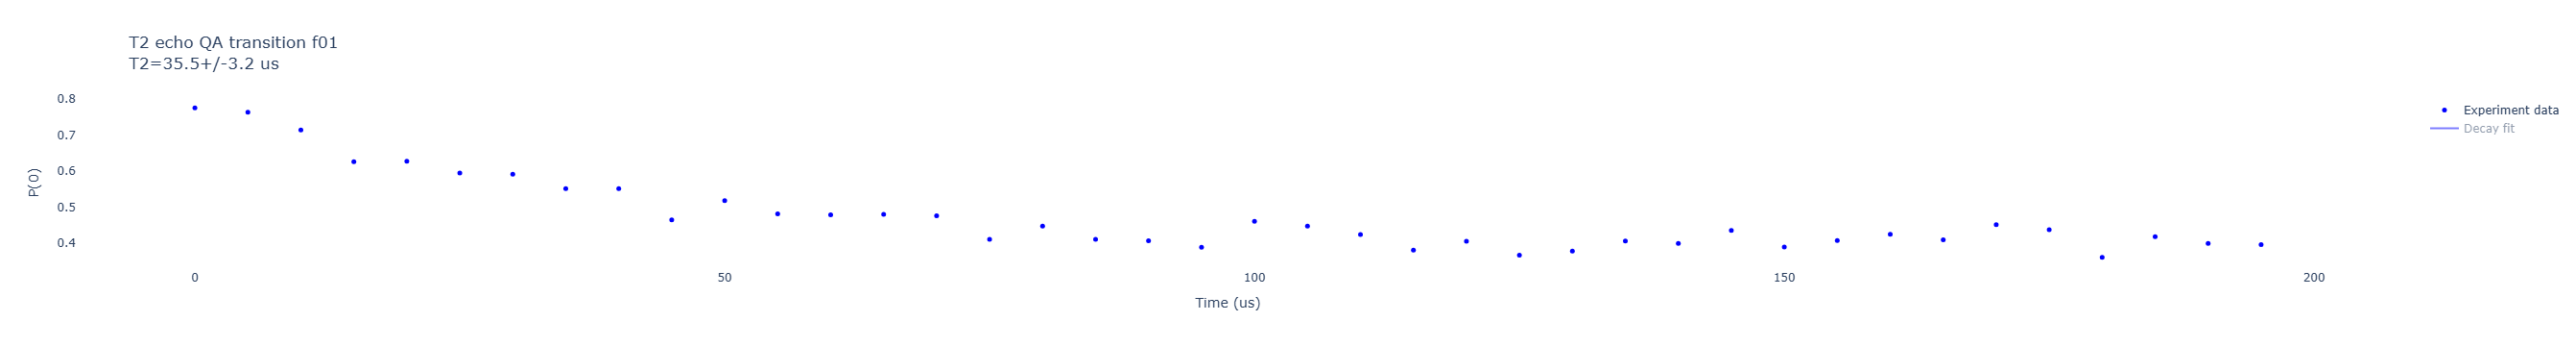

In [10]:
echo.plot_echo()

Sampling noise is enabled


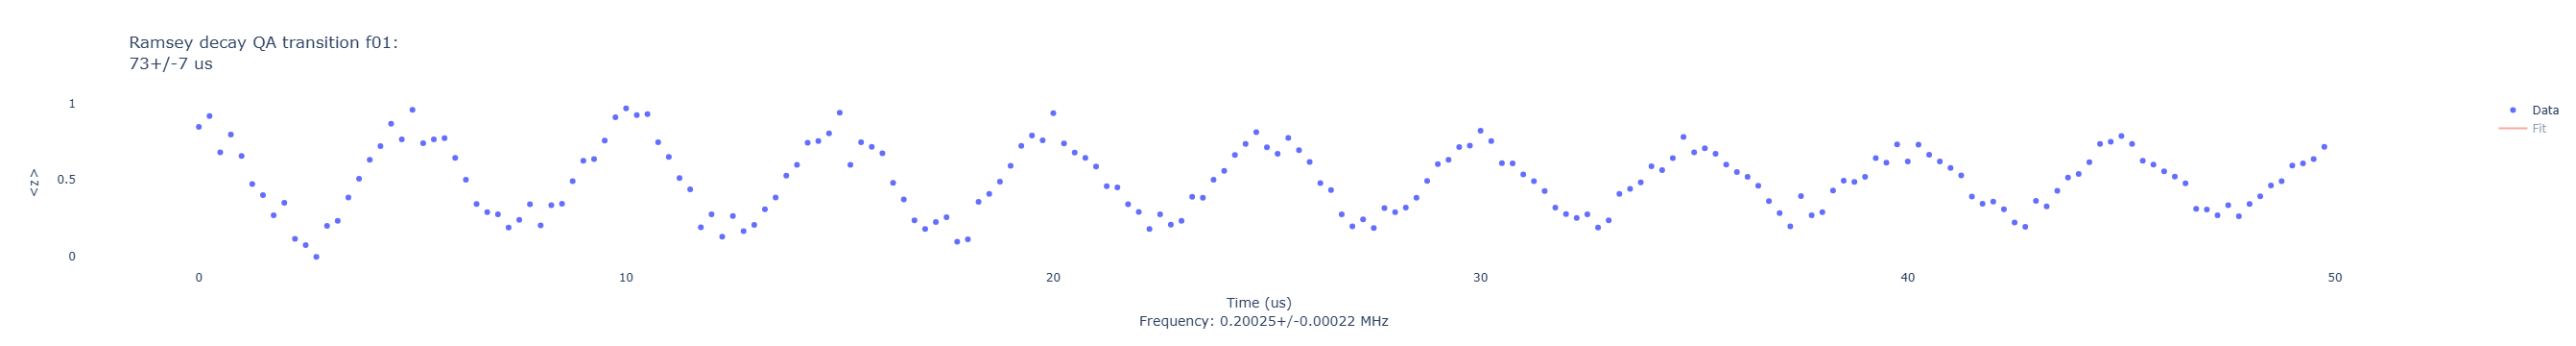

<IPython.core.display.JSON object>

In [11]:
ramsey = SimpleRamseyMultilevel(
    dut=duts_dict['Q1'],
    stop=50,
    step=0.25,
    set_offset=0.2
)